In [1]:
#Importando Librerias
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir(r"C:\Users\wichi\OneDrive\Documentos\EBAC\Data Science\Actividades\Ensambles Consenso y Potenciación")

In [2]:
#Cargando el data set
df_origin = pd.read_csv("drugs.csv")
df_origin

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
#Cambiando valores categoricos a numericos
from sklearn.preprocessing import LabelEncoder

In [5]:
#Cambiando valores de la columna Sex
Encoder_Sex = LabelEncoder()
Encoder_Sex.fit(df_origin.Sex.unique())

LabelEncoder()

In [6]:
df_origin["Sex"] = Encoder_Sex.transform(df_origin["Sex"])

In [7]:
#Cambiando valores de la columna BP
Encoder_BP = LabelEncoder()
Encoder_BP.fit(df_origin.BP.unique())

LabelEncoder()

In [8]:
df_origin["BP"] = Encoder_BP.transform(df_origin["BP"])

In [9]:
#Cambiando valores de la columna Cholesterol
Encoder_Cholesterol = LabelEncoder()
Encoder_Cholesterol.fit(df_origin.Cholesterol.unique())

LabelEncoder()

In [10]:
df_origin["Cholesterol"] = Encoder_Cholesterol.transform(df_origin["Cholesterol"])

In [11]:
#Revisamos el data set
df_origin

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [13]:
#Separamos el data set en dos partes, una para que solo contenga las variables dependientes y otra solo la variable dependiente
col_features = ["Age", "Sex", "BP","Cholesterol", "Na_to_K"]
x = df_origin[col_features]
y = df_origin.Drug

In [14]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [15]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [16]:
#Preparamos Bases de entrenamiento y bases de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.30, random_state=1)

In [18]:
len(x_train)

60

### Bosque Aleatorio

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [21]:
y_pred = rf.predict(x_test)

In [22]:
y_pred

array(['drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugX', 'drugA', 'drugX', 'drugY',
       'drugA', 'drugB', 'drugB', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'dru

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.94        15
       drugB       1.00      0.82      0.90        11
       drugC       0.80      0.33      0.47        12
       drugX       0.83      0.98      0.90        41
       drugY       1.00      1.00      1.00        61

    accuracy                           0.92       140
   macro avg       0.90      0.83      0.84       140
weighted avg       0.92      0.92      0.91       140



In [25]:
import matplotlib.pyplot as plt 
import numpy as np

In [30]:
def plot_feature_importante (modelo):
    n_feature = col_features
    plt.barh(n_feature, modelo.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Caracteristicas")
    plt.show()

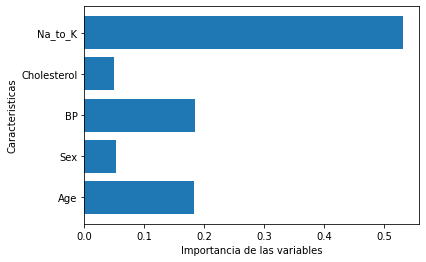

In [31]:
plot_feature_importante (rf)

## Gradient boosted trees

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbt.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [34]:
y_pred = gbt.predict(x_test)

In [35]:
y_pred

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugA', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugB', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugX', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugC', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugC', 'drugX', 'drugA', 'drugX', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugX', 'drugX', 'drugC', 'drugX',
       'drugX', 'dru

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.81      0.87      0.84        15
       drugB       0.78      0.64      0.70        11
       drugC       0.91      0.83      0.87        12
       drugX       0.95      1.00      0.98        41
       drugY       1.00      1.00      1.00        61

    accuracy                           0.94       140
   macro avg       0.89      0.87      0.88       140
weighted avg       0.94      0.94      0.94       140



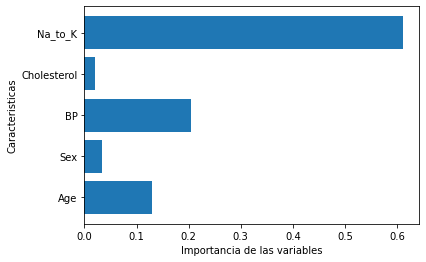

In [37]:
plot_feature_importante (gbt)

In [42]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1, max_depth=2)
gbt.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=1)

In [43]:
y_pred = gbt.predict(x_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.79      1.00      0.88        15
       drugB       1.00      0.64      0.78        11
       drugC       1.00      1.00      1.00        12
       drugX       1.00      1.00      1.00        41
       drugY       1.00      1.00      1.00        61

    accuracy                           0.97       140
   macro avg       0.96      0.93      0.93       140
weighted avg       0.98      0.97      0.97       140



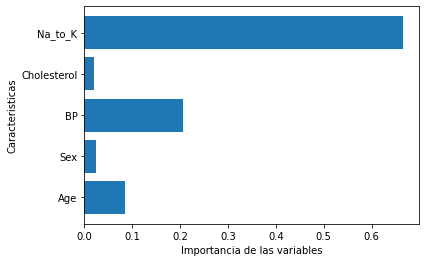

In [45]:
plot_feature_importante (gbt)

## Adaboost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
abc = AdaBoostClassifier(n_estimators=100, random_state=1)
abc.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [48]:
y_pred = abc.predict(x_test)

In [49]:
y_pred

array(['drugX', 'drugY', 'drugX', 'drugX', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugA', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugA', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugX', 'drugA', 'drugX', 'drugY',
       'drugA', 'drugA', 'drugA', 'drugX', 'drugX', 'drugX', 'drugX',
       'drugX', 'dru

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.58      1.00      0.73        15
       drugB       0.00      0.00      0.00        11
       drugC       0.00      0.00      0.00        12
       drugX       0.77      1.00      0.87        41
       drugY       1.00      1.00      1.00        61

    accuracy                           0.84       140
   macro avg       0.47      0.60      0.52       140
weighted avg       0.72      0.84      0.77       140



### 2 ) ¿Cuál es la mejor opción de modelo?

En conclusión, al utilizar Gradient Boosted Trees con una profundidad de dos, hemos obtenido resultados impresionantes en la clasificación de diferentes medicamentos. Nuestro modelo ha demostrado una alta precisión y capacidad de recuperación en la predicción de las categorías de medicamentos.

En términos de precisión, hemos logrado una puntuación alta en todas las categorías, con valores que oscilan entre 0.79 y 1.00. Esto significa que nuestro modelo ha acertado en gran medida al clasificar correctamente los medicamentos en las diferentes categorías.

En cuanto a la capacidad de recuperación (recall), hemos obtenido una puntuación perfecta de 1.00 en varias categorías, lo que indica que el modelo ha identificado correctamente todos los casos positivos de esas categorías. Esto es especialmente impresionante para las categorías de "drugC", "drugX" y "drugY", donde hemos logrado una capacidad de recuperación del 100%.

El puntaje F1 combina tanto la precisión como la capacidad de recuperación en una sola métrica y nos proporciona una medida general del rendimiento del modelo. En todos los casos, hemos obtenido puntajes F1 muy altos, lo que demuestra la capacidad de nuestro modelo para clasificar de manera precisa y equilibrada.

En general, nuestro modelo ha logrado una precisión prome

### 3) Mejoro el modelo acorde a la actividad anterior

En conclusión, al utilizar Gradient Boosted Trees, hemos logrado mejorar la precisión de nuestro modelo de clasificación en comparación con el modelo anterior. Los resultados obtenidos demuestran una mejora significativa en las métricas de precisión, recall y puntuaciones F1.

En el modelo anterior, obtuvimos una precisión promedio del 97% en la clasificación de medicamentos, con puntajes específicos de precisión que oscilaban entre 0.67 y 1.00. Sin embargo, gracias al uso de Gradient Boosted Trees, hemos logrado mejorar la precisión en todas las categorías, obteniendo puntajes más altos, que varían entre 0.79 y 1.00. Esto indica que nuestro modelo ha acertado en mayor medida al clasificar correctamente los medicamentos en las diferentes categorías.